# Assignment 2 - Ridge and LASSO Regression

In this assignment we'll look at the affect of using regularization on linear regression models that we train. You will write code to train models that use different regularizers and different penalties to analyze how this affects the model.


Fill in the cells provided marked `TODO` with code to answer the questions. Answers should do the computation stated rather than writing in hard-coded values. So for example, if a problem asks you to compute the average age of people in a dataset, you should be writing Python code in this notebook to do the computation instead of plugging it into some calculator and saving the hard-coded answer in the variable. In other words, we should be able to run your code on a smaller/larger dataset and get correct answers for those datasets with your code.

Note, you are not allowed to share any portions of this notebook outside of this class.

> Copyright ©2021 Emily Fox and Hunter Schafer.  All rights reserved.  Permission is hereby granted to students registered for University of Washington CSE/STAT 416 for use solely during Summer Quarter 2022 for purposes of the course.  No other use, copying, distribution, or modification is permitted without prior written consent. Copyrights for third-party components of this work must be honored.  Instructors interested in reusing these course materials should contact the author.

---

In [1]:
# Conventionally people rename these common imports for brevity
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Magic command to make the plots appear in-line (it's actually called a "magic command")
%matplotlib inline

**NOTE**: Be sure to run every cell in the notebook! The `###SKIP` is for the autograder. 

In [2]:
### SKIP
sales = pd.read_csv('home_data.csv')

# Set seed for the whole program
np.random.seed(416)

Do not modify the below cell. It configures the autograder, which will award 0 points if it doesn't run.

In [3]:
### edTest(test_load_data) ###

For this assignment, we will only be using a very small subset of the data to do our analysis. This is not something you would usually do in practice, but is something we do for this assignment to simplify the complexity of this dataset. The data is pretty noisy and to get meaningful results to demonstrate the theoretical behavior, you would need to use a much more complicated set of features that would be a bit more tedious to work with.

**NOTE**: Do NOT change `random_state=0`, else the autograder will fail.

In [4]:
# Selects 1% of the data
# NOTE: Do not change the random_state=0, else the autograder will fail
sales = sales.sample(frac=0.01, random_state=0)
print(f'Number of points: {len(sales)}')
sales.head()

Number of points: 216


id             date    price  bedrooms  bathrooms  sqft_living  \
17384  1453602313  20141029T000000   297000         2       1.50         1430   
722    2225059214  20140808T000000  1578000         4       3.25         4670   
2680   2768000270  20140625T000000   562100         2       0.75         1440   
18754  6819100040  20140624T000000   631500         2       1.00         1130   
14554  4027700666  20150426T000000   780000         4       2.50         3180   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
17384      1650     3.0           0     0  ...      7        1430   
722       51836     2.0           0     0  ...     12        4670   
2680       3700     1.0           0     0  ...      7        1200   
18754      2640     1.0           0     0  ...      8        1130   
14554      9603     2.0           0     2  ...      9        3180   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
17384              0      1999             0    98125  47.7222 -122.290   
722                0      1988             0    98005  47.6350 -122.164   
2680             240      1914             0    98107  47.6707 -122.364   
18754              0      1927             0    98109  47.6438 -122.357   
14554              0      2002             0    98155  47.7717 -122.277   

       sqft_living15  sqft_lot15  
17384           1430        1650  
722             4230       41075  
2680            1440        4300  
18754           1680        3200  
14554           2440       15261  

[5 rows x 21 columns]

## Q1 - Feature Engineering
First, we do a bit of feature engineering by creating features that represent the squares of each feature and the square root of each feature. One benefit of using regularization is you can include more features than necessary and you don't have to be as worried about overfitting since the model is regularized.

In the following cell, complete the code inside the loop to compute the square of each feature the the square root of each feature.

In [5]:
### edTest(test_feature_extraction) ###

from math import sqrt

# All of the features of interest
selected_inputs = [
    'bedrooms', 
    'bathrooms',
    'sqft_living', 
    'sqft_lot', 
    'floors', 
    'waterfront', 
    'view', 
    'condition', 
    'grade',
    'sqft_above',
    'sqft_basement',
    'yr_built', 
    'yr_renovated'
]

# Compute the square and sqrt of each feature
# At the end of the for loop: 
#    - sales should have additional columns for the square and 
#      sqrt of each of the selected inputs.
#    - all_features should contain the names (as strings) of all 
#      the features we care about.
all_features = []
for feature_name in selected_inputs:
    
    squared_feature_name = feature_name + '_square'
    sqrt_feature_name = feature_name + '_sqrt'
    
    # TODO compute the square of the column feature_name, add it to sales as a 
    # new column, squared_feature_name
    sales[squared_feature_name] = sales[feature_name] ** 2

    
    
    
    # TODO compute the sqrt of the column feature_name, add it to sales as a
    # new column, sqrt_feature_name
    sales[sqrt_feature_name] = sales[feature_name] ** 0.5
    
    
    

    # Add the feature names to all_features
    all_features.extend([feature_name, squared_feature_name, sqrt_feature_name])
    
# Split the data into features and price
price = sales['price']
sales = sales[all_features]

sales.head()

bedrooms  bedrooms_square  bedrooms_sqrt  bathrooms  bathrooms_square  \
17384         2                4       1.414214       1.50            2.2500   
722           4               16       2.000000       3.25           10.5625   
2680          2                4       1.414214       0.75            0.5625   
18754         2                4       1.414214       1.00            1.0000   
14554         4               16       2.000000       2.50            6.2500   

       bathrooms_sqrt  sqft_living  sqft_living_square  sqft_living_sqrt  \
17384        1.224745         1430             2044900         37.815341   
722          1.802776         4670            21808900         68.337398   
2680         0.866025         1440             2073600         37.947332   
18754        1.000000         1130             1276900         33.615473   
14554        1.581139         3180            10112400         56.391489   

       sqft_lot  ...  sqft_above_sqrt  sqft_basement  sqft_basement_square  \
17384      1650  ...        37.815341              0                     0   
722       51836  ...        68.337398              0                     0   
2680       3700  ...        34.641016            240                 57600   
18754      2640  ...        33.615473              0                     0   
14554      9603  ...        56.391489              0                     0   

       sqft_basement_sqrt  yr_built  yr_built_square  yr_built_sqrt  \
17384            0.000000      1999          3996001      44.710178   
722              0.000000      1988          3952144      44.586994   
2680            15.491933      1914          3663396      43.749286   
18754            0.000000      1927          3713329      43.897608   
14554            0.000000      2002          4008004      44.743715   

       yr_renovated  yr_renovated_square  yr_renovated_sqrt  
17384             0                    0                0.0  
722               0                    0                0.0  
2680              0                    0                0.0  
18754             0                    0                0.0  
14554             0                    0                0.0  

[5 rows x 39 columns]

## Split Data
Next, we need to split our data into our train, validation, and test data. To do this, we will use [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function to split up the dataset. For this assignment we will use 70% of the data to train, 10% for validation, and 20% to test. 

**NOTE**: Do NOT change `random_state=6`, else the autograder will fail.

In [6]:
from sklearn.model_selection import train_test_split

# NOTE: Do not change the random_state=6, else the autograder will fail
sales_train_and_validation, sales_test, price_train_and_validation, price_test = \
    train_test_split(sales, price, test_size=0.2, random_state=6)
sales_train, sales_validation, price_train, price_validation = \
    train_test_split(sales_train_and_validation, price_train_and_validation, test_size=.125, random_state=6) # .10 (validation) of .80 (train + validation)

## Q2 - Standardization

We first need to do a little bit more pre-processing to prepare the data for model training. Models like Ridge and LASSO assume the input features are standardized (mean 0, std. dev. 1) and the target values are centered (mean 0). If we do not do this, we might get some unpredictable results since we violate the assumption of the models!

So in the next cell, you should standardize the data in train, validation, and test using the following instructions:
* Use the [StandardScaler](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling) preprocessor provided by scikit-learn to do the standardization for you. 
  * Note that you first `fit` it to the data so it can compute the mean/standard deviation and then `transform` to actually change the data. You'll find the examples on this documentation very helpful.
* You should only do this transformation on the features we are using of the data (not any of the other data inputs or the target values). 
* This next note will sound a bit weird, but it's an important step. **You should only do the standardization calculation (e.g., the mean and the standard deviation) on the *training* set and use those statistics to scale the validation and test set**. In other words, the validation and test set should be standardized using the statistics from the training data so that you are using a consistent transformation throughout. This is important to do since you need to apply the same transformation process to every step of the data and you shouldn't use statistics from data outside of your training set in your transformations.

In [7]:
### edTest(test_standardization) ###

from sklearn.preprocessing import StandardScaler

# TODO preprocess the training, validation, and test data

# output_col = price

train_X = sales_train
# train_y = price_train[output_col]

val_X = sales_validation
# val_y = price_validation[output_col]

test_X = sales_test
# test_y = price_test[output_col]

scaler = StandardScaler()
scaler.fit(train_X)
sales_train_standardized = scaler.transform(train_X)
sales_validation_standardized = scaler.transform(val_X)
sales_test_standardized = scaler.transform(test_X)

# Linear Regression 
## Q3) Linear Regression Baseline

As a baseline, we will first, train a regular `LinearRegression` model on the data using the features in `all_features` and report its **test RMSE**. Write the code in the cell below to calculate the answer. Save your result in a variable named `test_rmse_unregularized`.


In [8]:
### edTest(test_train_linear_regression) ###

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# TODO Train a linear regression model
basic_model = LinearRegression().fit(sales_train_standardized, price_train) 
from sklearn.metrics import mean_squared_error
def rmse(model, X, y):
    predictions = model.predict(X)
    return mean_squared_error(predictions, y, squared=False)

rmse_test_unregularized = rmse(basic_model, sales_test_standardized, price_test)
print("Test RMSE", rmse_test_unregularized)

Test RMSE 384955.7993670649


--- 
# Ridge Regression
At this point, you might be looking forward at the homework and seeing how long it is! We want to provide a lot of instruction so you aren't left completely in the dark on what to do, but we are also trying to avoid just giving you a bunch of starter code and just having you fill in the blanks. This section is very long because it tries to give really detailed instructions on what to compute. The next section on LASSO has almost exactly the same steps so it will be a lot easier doing that part of the assignment!

In this section, we will do some **hyper-parameter tuning** to find the optimal setting of the regularization constant $\lambda$ for Ridge Regression. Remember that $\lambda$ is the coefficient that controls how much the model is penalized for having large weights in the optimization function.

$$\hat{w}_{ridge} = \min_w MSE(w) + \lambda \left\lVert w \right\rVert_2^2$$

where $\left\lVert w \right\rVert_2^2 = \sum_{j=0}^D w_j^2$ is the $l_2$-norm of the parameters. By default, `sklearn`'s `Ridge` class does not regularize the intercept.

## Q4) Train Ridge Models
For this part of the assignment, you will be writing code to find the optimal setting of the penalty $\lambda$. Below, we describe what steps you will want to have in your code to compute these values:

*Implementation Details*
* Use the following choices of $l_2$ penalty: $[10^{-5}, 10^{-4}, ..., 10^4, 10^5]$. In Python, you can create a list of these numbers using `np.logspace(-5, 5, 11, base=10)`. 
* Use the [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) class from sklearn to train a Ridge Regression model on the **training** data. The **only** parameters you need to pass when constructing the Ridge model are $\lambda$, which lets you specify what you want the $l_2$ penalty to be. (NOTE: sklearn's Ridge class uses `alpha` instead of `lambda`; only the name is different but they function in the same way.)
* Evaluate both the training error and the validation error for the model by reporting the RMSE of each dataset.
* **Put all of your results in a pandas `DataFrame` named `ridge_data`** so you can analyze them later. The `ridge_data` should have a row for each $l_2$ penalty you tried and should have the following columns:
  * `l2_penalty`: The $l_2$ penalty for that row
  * `model`: The actual `Ridge` model object that was trained with that $l_2$ penalty
  * `rmse_train`: The training RMSE for that model
  * `rmse_validation`: The validation RMSE for that model
* To build up this `DataFrame`, we recommend first building up a list of dictionary objects and then converting that to a `DataFrame`. For example, the following code would produce the following `pandas.DataFrame`.
```python
data = []
for i in range(3):
    data.append({
        'col_a': i,
        'col_b': 2 * i
    }
data_frame = pd.DataFrame(data)
```

| col_a | col_b | 
|-------|-------|
|   0   |   0   | 
|   1   |   2   | 
|   2   |   4   |

*Hints: Here is a development strategy that you might find helpful*
* You will need a loop to loop over the possible $l_2$ penalties. Try writing the code without a loop first with just one setting of $\lambda$. Try writing a lot of the code without a loop first if you're stuck to help you figure out how the pieces go together. You can safely ignore building up the result `DataFrame` at first, just print all the information out to start! 
* If you are running into troubles writing your loop, try to print values out to investigate what's going wrong.
* Remember to use RMSE for calculating the error!


In [9]:
### edTest(test_ridge) ###

from sklearn.linear_model import Ridge

l2_lambdas = np.logspace(-5, 5, 11, base = 10)
def rmse(model, X, y):
    predictions = model.predict(X)
    return mean_squared_error(predictions, y, squared=False)
data = []

# TODO Implement code to evaluate Ridge Regression with various l2 Penalties
# Note that Ridge uses "alpha" to refer to the variable we have been calling "lambda"
for value in l2_lambdas:
    ridge_model = Ridge(alpha=value)
    ridge_model.fit(sales_train_standardized, price_train)
    data.append({
        'l2_penalty': value,
        'model': ridge_model,
        'rmse_train': rmse(ridge_model, sales_train_standardized, price_train),
        'rmse_validation': rmse(ridge_model, sales_validation_standardized, price_validation)
    })
ridge_data = pd.DataFrame(data)
ridge_data

l2_penalty                  model     rmse_train  rmse_validation
0        0.00001     Ridge(alpha=1e-05)  146188.566942    392112.522241
1        0.00010    Ridge(alpha=0.0001)  146210.884175    392721.061566
2        0.00100     Ridge(alpha=0.001)  146610.292053    393099.892724
3        0.01000      Ridge(alpha=0.01)  147967.692703    369263.393012
4        0.10000       Ridge(alpha=0.1)  151619.819399    330722.661247
5        1.00000                Ridge()  154932.690092    302623.478585
6       10.00000      Ridge(alpha=10.0)  161876.430362    282876.469131
7      100.00000     Ridge(alpha=100.0)  181371.431142    283001.128683
8     1000.00000    Ridge(alpha=1000.0)  244296.061524    341022.423065
9    10000.00000   Ridge(alpha=10000.0)  328840.881425    486101.010743
10  100000.00000  Ridge(alpha=100000.0)  353757.594802    528264.491801

Next, let's investigate how the penalty affects the train and validation error by running the following plotting code. 

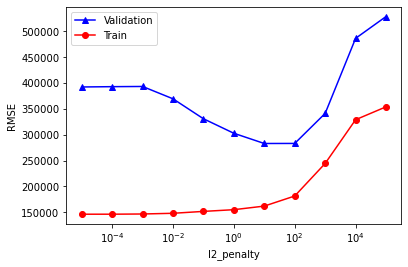

In [10]:
# Plot the validation RMSE as a blue line with dots
plt.plot(ridge_data['l2_penalty'], ridge_data['rmse_validation'], 
         'b-^', label='Validation')
# Plot the train RMSE as a red line dots
plt.plot(ridge_data['l2_penalty'], ridge_data['rmse_train'], 
         'r-o', label='Train')

# Make the x-axis log scale for readability
plt.xscale('log')

# Label the axes and make a legend
plt.xlabel('l2_penalty')
plt.ylabel('RMSE')
plt.legend()

Next, we want to actually look at which model we think will perform best. First we define a helper function that will be used to inspect the model parameters.

In [11]:
def print_coefficients(model, features):
    """
    This function takes in a model column and a features column. 
    And prints the coefficient along with its feature name.
    """
    feats = list(zip(features, model.coef_))
    print(*feats, sep = "\n")

## Q5 - Inspecting Coefficients
In the cell below, write code that uses the `ridge_data` `DataFrame` to select which L2 penalty we would choose based on the evaluations we did in the previous section. Compute the following: 

* **Q5.1** -  The best L2 penalty based on the model evaluations. Save this L2 penalty in a variable called `best_l2`.
* **Q5.2** - The best model's error on the **test** dataset. Report the number as an RMSE stored in a variable called `rmse_test_ridge`.
* **Q5.2** The number of coefficients in the best model that are 0. Save this in a variable called `num_zero_coeffs_ridge`. Use the `print_coefficients` function to help you check your result.

Recall that you **may NOT hardcode** values and must instead write code to compute the values; we are testing the data on a slightly different dataset, so hardcoded values from this dataset will be marked as wrong.

Use the next cell answer all three questions. You should also print out the values so you can inspect them.

### Tip

A `pandas` `DataFrame` has a method `idxmin()` function to find the index of the smallest value in a column, and a property `loc` to access a sepcified index. As an example, suppose we had a `DataFrame` named `df`:

| a | b | c |
|---|---|---|
| 1 | 2 | 3 |
| 2 | 1 | 3 |
| 3 | 2 | 1 |

If we wrote the code 
```python
index = df['b'].idxmin()
row = df.loc[index]
```

It would first find the index of the smallest value in the `b` column and then uses the `.loc` property of the `DataFrame` to access that particular row. It will return a `Series` object (basically a Python dictionary) which means you can use syntax like `row['a']` to access a particular column of that row.

In [12]:
### edTest(test_ridge_analysis) ###

# TODO Print information about best l2 model
index = ridge_data['rmse_validation'].idxmin()
row = ridge_data.loc[index]
best_l2 = row['l2_penalty']

ridge_model = Ridge(alpha=row['l2_penalty'])
ridge_model.fit(sales_train_standardized, price_train)
rmse_test_ridge = rmse(ridge_model, sales_test_standardized, price_test)

num_zero_coeffs_ridge = 0
for number in ridge_model.coef_:
  if number == 0:
    num_zero_coeffs_ridge += 1

    

# Print your results to help you check their correctness.
print('L2 Penalty',  best_l2)
print('Test RSME', rmse_test_ridge)
print('Num Zero Coeffs', num_zero_coeffs_ridge)


L2 Penalty 10.0
Test RSME 354624.84725194686
Num Zero Coeffs 0


--- 
# LASSO Regression
In this section you will do basically the exact same analysis you did with Ridge Regression, but using LASSO Regression instead. It's okay if your code for this section looks very similar to your code for the last section. 

Remember that for LASSO we choose the parameters that minimize this quality metric instead 

$$\hat{w}_{LASSO} = \min_w MSE(w) + \lambda \left\lVert w \right\rVert_1$$

where $\left\lVert w \right\rVert_1 = \sum_{j=0}^D | w_j |$ is the L1 norm of the parameter vector.

## Q6) Train LASSO Models
We will use the same set of instructions for LASSO as we did for Ridge, except for the following differences. Please refer back to the Ridge Regression instructions and your code to see how these differences fit in!

* Use the [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso) model. Like before, the only parameters you need to pass in are $\lambda$ for the L1 penalty. Like before, sklearn uses the parameter `alpha` instead of `lambda`, but it does the same thing as the `lambda` we discussed in class.
* The range L1 penalties should be $[10, 10^2, ..., 10^7]$. In Python, this is `np.logspace(1, 7, 7, base=10)`.
* The result should be stored in a `DataFrame` named `lasso_data`. All the columns should have the same name and corresponding values except the penalty column should be called `l1_penalty`.
* It is okay if your code prints some `ConvergenceWarning` warnings, these should not impact your results!.

You do not need to worry about your code being redundant with the last section for this part.

In [13]:
### edTest(test_lasso) ###

from sklearn.linear_model import Lasso

l1_lambdas = np.logspace(1, 7, 7, base=10)
data_1 = []
# TODO Implement code to evaluate LASSO Regression with various L1 penalties
for values in l1_lambdas:
    lasso_model = Lasso(alpha=values)
    lasso_model.fit(sales_train_standardized, price_train)
    data_1.append({
        'l1_penalty': values,
        'model': lasso_model,
        'rmse_train': rmse(lasso_model, sales_train_standardized, price_train),
        'rmse_validation': rmse(lasso_model, sales_validation_standardized, price_validation)
    })


lasso_data = pd.DataFrame(data_1)
lasso_data

/usr/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.653e+12, tolerance: 1.913e+09
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.000e+12, tolerance: 1.913e+09
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.343e+09, tolerance: 1.913e+09
  model = cd_f

l1_penalty                    model     rmse_train  rmse_validation
0        10.0        Lasso(alpha=10.0)  151336.667973    335371.150569
1       100.0       Lasso(alpha=100.0)  152164.419039    323670.679137
2      1000.0      Lasso(alpha=1000.0)  156360.395434    285201.302593
3     10000.0     Lasso(alpha=10000.0)  169912.542560    271138.560249
4    100000.0    Lasso(alpha=100000.0)  239553.336550    340385.511537
5   1000000.0   Lasso(alpha=1000000.0)  357105.698956    533861.713077
6  10000000.0  Lasso(alpha=10000000.0)  357105.698956    533861.713077

Like before, let's look at how the L1 penalty affects the performance.

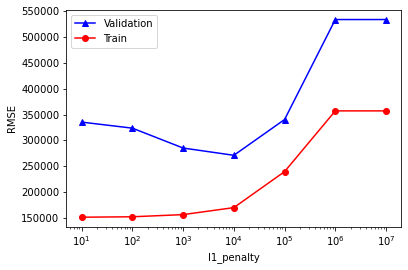

In [14]:
# Plot the validation RMSE as a blue line with dots

plt.plot(lasso_data['l1_penalty'], lasso_data['rmse_validation'],
         'b-^', label='Validation')

# Plot the train RMSE as a red line dots
plt.plot(lasso_data['l1_penalty'], lasso_data['rmse_train'],
         'r-o', label='Train')

# Make the x-axis log scale for readability
plt.xscale('log')

# Label the axes and make a legend
plt.xlabel('l1_penalty')
plt.ylabel('RMSE')
plt.legend()

## Q7 - Inspecting Coefficients
Like before, in the cell below, write code that uses the `lasso_data` `DataFrame` to select which L1 penalty we would choose based on the evaluations we did in the previous section. Compute the following:

* **Q7.1** -  The best L1 penalty based on the model evaluations. Save this L1 penalty in a variable called `best_l1`.
* **Q7.2** - The best model's error on the **test** dataset. Report the number as an RMSE stored in a variable called `rmse_test_lasso`.
* **Q7.3** - The number of coefficients in the best model that are 0. Store this in a variable called `num_zero_coeffs_lasso`. Note that `-0.0` and `0.0` are the same for our purposes. Use the `print_coefficients` function to help you check your result.

In [15]:
### edTest(test_lasso_analysis) ###

# TODO Print information about best L1 model
index = lasso_data['rmse_validation'].idxmin()
row = lasso_data.loc[index]
best_l1 = row['l1_penalty']

lasso_model = Lasso(alpha=row['l1_penalty'])
lasso_model.fit(sales_train_standardized, price_train)
rmse_test_lasso = rmse(lasso_model, sales_test_standardized, price_test)

num_zero_coeffs_lasso = 0
for numbers in lasso_model.coef_:
  if numbers == 0:
    num_zero_coeffs_lasso += 1


# Print your results to help you check their correctness.
print('Best L1 Penalty', best_l1)
print('Test RMSE', rmse_test_lasso)
print('Num Zero Coeffs', num_zero_coeffs_lasso)

Best L1 Penalty 10000.0
Test RMSE 344434.8333379938
Num Zero Coeffs 29


**Q7.4 -** Let's look at which coefficients ended up having a 0 coefficient. In the cell below, we print the name of all features with coefficient 0. Note, we actually have to check if it is near 0 since numeric computations in Python sometimes yield slight rounding errors (e.g., how 1/3 is .333333333333 and that can't be represented precisely in a computer)


In [16]:
### edTest(test_best_model_lasso) ###


# TODO: Use code like from the above cell to get the best model.
best_model_lasso = Lasso(alpha=best_l1)
best_model_lasso.fit(sales_train_standardized, price_train)

for feature, coef in zip(all_features, best_model_lasso.coef_):
  if abs(coef) <= 10 ** -17:
    print(feature)

bedrooms
bedrooms_square
bathrooms
bathrooms_sqrt
sqft_living
sqft_living_square
sqft_living_sqrt
sqft_lot
sqft_lot_sqrt
floors
floors_square
waterfront_square
waterfront_sqrt
view
view_square
view_sqrt
condition
condition_square
condition_sqrt
grade
grade_sqrt
sqft_above
sqft_above_sqrt
sqft_basement
sqft_basement_square
sqft_basement_sqrt
yr_built_square
yr_renovated
yr_renovated_sqrt
